In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


data = pd.read_csv('../input/pancancer/TCGA-PANCAN-HiSeq-801x20531/data.csv',index_col = 0)
data.head()
data.shape
data.isnull().sum()
data.info()

label =pd.read_csv('../input/pancancer/TCGA-PANCAN-HiSeq-801x20531/labels.csv')
label.head()
label.shape
label.isnull().sum()
label['Class'].unique()
X = data.values
X[:5]
#standardizing the data
SS= StandardScaler()
S_data = SS.fit_transform(X)
#creating functions to use for the visualization
#dimentionality reduction and visualizing with pca
def pca(X, y):
	pca = PCA(n_components = 2)
	pca_data = pca.fit_transform(X)
	P_df = pd.DataFrame(pca_data, columns= ['pca1', 'pca2']).join(y)
	return sns.scatterplot(x ='pca1', y = 'pca2', hue='Class', data = P_df)
#dimensional reduction and visualizing with tsne
def tsne(X, y):
	tsne = TSNE(n_components = 2, learning_rate = 5, random_state = 42)
	t_data = tsne.fit_transform(X)
	t_df = pd.DataFrame(t_data, columns = ['tsne1','tsne2']).join(y)
	return sns.scatterplot(x = 'tsne1', y = 'tsne2', hue = 'Class', data = t_df)
	
#dimensionality reduction and visualizing with pca + tsne
def pca_tsne(X, y):
	pca = PCA(n_components = 50)
	p_data = pca.fit_transform(X)
	tsne = TSNE(n_components = 2, learning_rate = 5, random_state = 42)
	t_data = tsne.fit_transform(p_data)
	t_df = pd.DataFrame(t_data, columns = ['p_tsne1', 'p_tsne2']).join(y)
	return sns.scatterplot(x = 'p_tsne1', y = 'p_tsne2', hue = 'Class', data = t_df)

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5+ MB


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

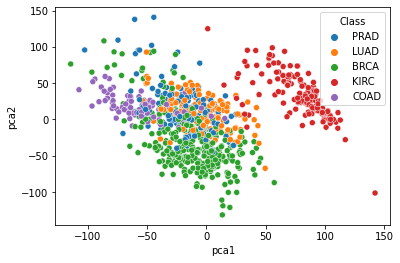

In [2]:
pca(S_data, label)


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

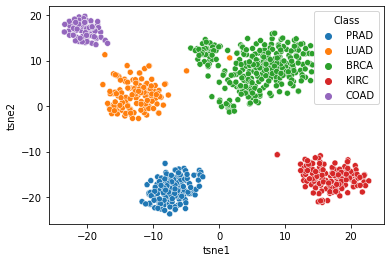

In [3]:
tsne(S_data,label)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='p_tsne1', ylabel='p_tsne2'>

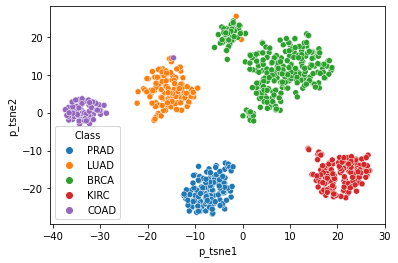

In [4]:
pca_tsne(S_data, label)